# Example 1-1 Linear Regession

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Code Example

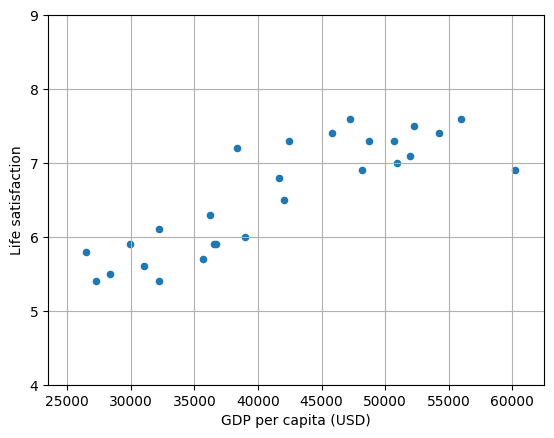

[[6.30165767]]


In [2]:
# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]

# Recreating to Forecast Natural Gas Storage

In [45]:
eia = pd.read_csv('/content/eia_storage.csv')
eia['Date'] = pd.to_datetime(eia['Date'])
eia['Date'] = eia['Date'] + pd.Timedelta(days=1)

archive_degree_days = pd.read_csv('/content/weekly_hdd_cdd_state_archive.csv')
current_degree_days = pd.read_csv('/content/weekly_hdd_cdd_state_current.csv')
degree_days = pd.concat([archive_degree_days,current_degree_days])
degree_days['DATE'] = pd.to_datetime(degree_days['DATE'])

In [62]:
l48 = eia[['Date','L48']].set_index('Date')
l48 = l48.diff()

us_dd = degree_days.loc[degree_days['AREA'] == 'UNITED STATES']
us_dd = us_dd.pivot_table(index='DATE', columns='HDD/CDD', values='WEEK TOTAL')

data = us_dd.merge(l48, left_index=True, right_index=True, how='left')
first_non_nan_index = data['L48'].first_valid_index()
data = data.loc[data.index >= first_non_nan_index]
data['HDD/CDD'] = data['HDD'] + data['CDD']
predict = data['HDD/CDD'][-1]
data = data.dropna(subset=['L48'])

In [64]:
display(data)

,CDD,HDD,L48,HDD/CDD
DATE,,,,
2010-01-09,0.0,256.0,-267.0,256.0
2010-01-16,0.0,211.0,-243.0,211.0
2010-01-23,2.0,164.0,-86.0,166.0
2010-01-30,1.0,198.0,-115.0,199.0
2010-02-06,1.0,210.0,-192.0,211.0
...,...,...,...,...
2024-05-18,19.0,24.0,79.0,43.0
2024-05-25,37.0,16.0,85.0,53.0
2024-06-01,30.0,16.0,96.0,46.0


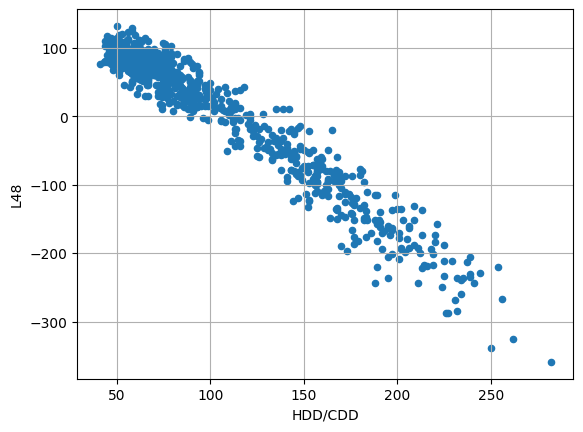

[[55.82514584]]


In [65]:
# Download and prepare the data
X = data[["HDD/CDD"]].values
y = data[["L48"]].values

# Visualize the data
data.plot(kind='scatter', grid=True,
             x="HDD/CDD", y="L48")
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Storage the next week
X_new = [[predict]]  # HDD/CDD Sum for week forecast
print(model.predict(X_new)) # outputs [[6.30165767]]